In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [6]:
for root, dirs, files in os.walk(Dir):
    for name in files:
        if name.endswith('genes.tsv.gz')==0 : continue
        suffix = 'genes.tsv.gz'
        new_name = name[:-len(suffix)] + 'features.tsv.gz'
        print(name)
        print('New: ', new_name)
        os.rename(Dir+'/'+name, Dir+'/'+new_name)

GSM4138125_HNSCC_8_TIL_genes.tsv.gz
New:  GSM4138125_HNSCC_8_TIL_features.tsv.gz
GSM4138168_HD_1_Tonsil_genes.tsv.gz
New:  GSM4138168_HD_1_Tonsil_features.tsv.gz
GSM4138116_HNSCC_4_PBMC_genes.tsv.gz
New:  GSM4138116_HNSCC_4_PBMC_features.tsv.gz
GSM4138114_HNSCC_3_PBMC_genes.tsv.gz
New:  GSM4138114_HNSCC_3_PBMC_features.tsv.gz
GSM4138149_HNSCC_20_TIL_genes.tsv.gz
New:  GSM4138149_HNSCC_20_TIL_features.tsv.gz
GSM4138147_HNSCC_19_TIL_genes.tsv.gz
New:  GSM4138147_HNSCC_19_TIL_features.tsv.gz
GSM4138120_HNSCC_6_PBMC_genes.tsv.gz
New:  GSM4138120_HNSCC_6_PBMC_features.tsv.gz
GSM4138127_HNSCC_9_TIL_genes.tsv.gz
New:  GSM4138127_HNSCC_9_TIL_features.tsv.gz
GSM4138164_HD_3_PBMC_genes.tsv.gz
New:  GSM4138164_HD_3_PBMC_features.tsv.gz
GSM4138123_HNSCC_7_TIL_genes.tsv.gz
New:  GSM4138123_HNSCC_7_TIL_features.tsv.gz
GSM4138161_HNSCC_26_TIL_genes.tsv.gz
New:  GSM4138161_HNSCC_26_TIL_features.tsv.gz
GSM4138117_HNSCC_4_TIL_genes.tsv.gz
New:  GSM4138117_HNSCC_4_TIL_features.tsv.gz
GSM4138111_HNSCC_1_T

In [20]:
flag = 0
cnt =1
import os
import anndata as ad
Dir = "GSE139324_RAW"
for root, dirs, files in os.walk(Dir):
    for name in files:
        if name.endswith('matrix.mtx.gz')==0 : continue
        print(cnt)
        print(name)  
        suffix = 'matrix.mtx.gz'
        prefix = name[:-len(suffix)]

        sample_id = prefix[len('GSM5237042_'):-1]
        Tissue_type = prefix.split('_')[3]
        print("Sample:",sample_id)
        print("Tissuetype:", Tissue_type)

        print('------adata-----')
        adata2 = sc.read_mtx(Dir+'/'+name)
        adata2 = adata2.T
        
        barcodes = pd.read_csv(Dir+'/'+prefix+'barcodes.tsv.gz',sep='\t',header=None)
        adata2.obs_names = barcodes[0].copy()
        features = pd.read_csv(Dir+'/'+prefix+'features.tsv.gz',sep='\t',header=None)
        adata2.var_names = features[1].copy()
        
        adata2.obs['Sample'] = sample_id
        adata2.obs['Tissue_type'] = Tissue_type

        adata2.obs_names = [sample_id+'_'+obs_name for obs_name in adata2.obs_names]
        print(adata2)
        
        print({'DDX3Y', 'UTY', 'KDM5D', 'USP9Y', 'ZFY', 'RPS4Y1', 
               'TMSB4Y', 'EIF1AY', 'NLGN4Y'}.difference(adata2.var_names))

        #print(adata.obs)
        adata2.obs_names_make_unique()
        adata2.var_names_make_unique()
        print('------cadata-----')
        if flag == 0:
            cadata = adata2
            print(cadata)
            flag = 1
        else:
            cadata = [cadata, adata2]
            cadata = ad.concat(cadata, merge='same')
            cadata.obs_names_make_unique()
            print(cadata)
        cnt+=1
        
        print('----------------------------')

1
GSM4138145_HNSCC_18_TIL_matrix.mtx.gz
Sample: HNSCC_18_TIL
Tissuetype: TIL
------adata-----
AnnData object with n_obs × n_vars = 2651 × 33694
    obs: 'Sample', 'Tissue_type'
set()
------cadata-----
AnnData object with n_obs × n_vars = 2651 × 33694
    obs: 'Sample', 'Tissue_type'
----------------------------
2
GSM4138155_HNSCC_23_TIL_matrix.mtx.gz
Sample: HNSCC_23_TIL
Tissuetype: TIL
------adata-----
AnnData object with n_obs × n_vars = 2313 × 33694
    obs: 'Sample', 'Tissue_type'
set()
------cadata-----
AnnData object with n_obs × n_vars = 4964 × 33694
    obs: 'Sample', 'Tissue_type'
----------------------------
3
GSM4138167_HD_6_PBMC_matrix.mtx.gz
Sample: HD_6_PBMC
Tissuetype: PBMC
------adata-----
AnnData object with n_obs × n_vars = 1408 × 33694
    obs: 'Sample', 'Tissue_type'
set()
------cadata-----
AnnData object with n_obs × n_vars = 6372 × 33694
    obs: 'Sample', 'Tissue_type'
----------------------------
4
GSM4138115_HNSCC_3_TIL_matrix.mtx.gz
Sample: HNSCC_3_TIL
Tissuet

AnnData object with n_obs × n_vars = 3802 × 33694
    obs: 'Sample', 'Tissue_type'
set()
------cadata-----
AnnData object with n_obs × n_vars = 56381 × 33694
    obs: 'Sample', 'Tissue_type'
----------------------------
28
GSM4138113_HNSCC_2_TIL_matrix.mtx.gz
Sample: HNSCC_2_TIL
Tissuetype: TIL
------adata-----
AnnData object with n_obs × n_vars = 2286 × 33694
    obs: 'Sample', 'Tissue_type'
set()
------cadata-----
AnnData object with n_obs × n_vars = 58667 × 33694
    obs: 'Sample', 'Tissue_type'
----------------------------
29
GSM4138169_HD_2_Tonsil_matrix.mtx.gz
Sample: HD_2_Tonsil
Tissuetype: Tonsil
------adata-----
AnnData object with n_obs × n_vars = 2709 × 33694
    obs: 'Sample', 'Tissue_type'
set()
------cadata-----
AnnData object with n_obs × n_vars = 61376 × 33694
    obs: 'Sample', 'Tissue_type'
----------------------------
30
GSM4138168_HD_1_Tonsil_matrix.mtx.gz
Sample: HD_1_Tonsil
Tissuetype: Tonsil
------adata-----
AnnData object with n_obs × n_vars = 3325 × 33694
    o

AnnData object with n_obs × n_vars = 1806 × 33694
    obs: 'Sample', 'Tissue_type'
set()
------cadata-----
AnnData object with n_obs × n_vars = 109788 × 33694
    obs: 'Sample', 'Tissue_type'
----------------------------
54
GSM4138143_HNSCC_17_TIL_matrix.mtx.gz
Sample: HNSCC_17_TIL
Tissuetype: TIL
------adata-----
AnnData object with n_obs × n_vars = 3116 × 33694
    obs: 'Sample', 'Tissue_type'
set()
------cadata-----
AnnData object with n_obs × n_vars = 112904 × 33694
    obs: 'Sample', 'Tissue_type'
----------------------------
55
GSM4138148_HNSCC_20_PBMC_matrix.mtx.gz
Sample: HNSCC_20_PBMC
Tissuetype: PBMC
------adata-----
AnnData object with n_obs × n_vars = 1530 × 33694
    obs: 'Sample', 'Tissue_type'
set()
------cadata-----
AnnData object with n_obs × n_vars = 114434 × 33694
    obs: 'Sample', 'Tissue_type'
----------------------------
56
GSM4138160_HNSCC_26_PBMC_matrix.mtx.gz
Sample: HNSCC_26_PBMC
Tissuetype: PBMC
------adata-----
AnnData object with n_obs × n_vars = 1730 × 33

In [27]:
meta = pd.read_excel('GSE139324_clinic.xlsx')
cadata.obs['Patient'] = [samp.split('_')[0]+'_'+samp.split('_')[1] for samp in cadata.obs['Sample']]
cadata.obs['Selection']='CD45+ cells'
cadata.obs['Sex'] = cadata.obs['Patient'].map(dict(zip(meta['Patient Identifier'], meta['Sex'])))
cadata.obs['Age'] = cadata.obs['Patient'].map(dict(zip(meta['Patient Identifier'], meta['Age'])))
cadata.obs['Race'] = cadata.obs['Patient'].map(dict(zip(meta['Patient Identifier'], meta['Race'])))
cadata.obs['Smoking'] = cadata.obs['Patient'].map(dict(zip(meta['Patient Identifier'], meta['Tobacco Use'])))
cadata.obs['Alcohol'] = cadata.obs['Patient'].map(dict(zip(meta['Patient Identifier'], meta['Alcohol Use'])))

In [28]:
cadata.obs['DataID'] = 'GSE139324'
cadata.obs['Cancertype'] = 'HNSC'

In [31]:
cadata.write_h5ad('GSE139324_count.h5ad',compression='gzip')

# QC

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [32]:
cadata.layers['Count'] = cadata.X.copy()

In [33]:
#Quality control
cadata.var['mt'] = cadata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as ‘mt’
sc.pp.calculate_qc_metrics(cadata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/

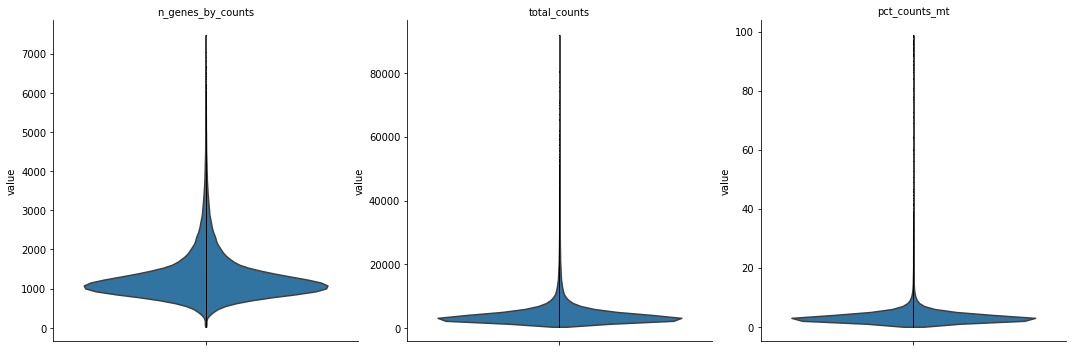

In [34]:
sc.pl.violin(cadata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0, multi_panel=True)

In [35]:
cadata = cadata[cadata.obs['pct_counts_mt']<20,:].copy()
cadata

AnnData object with n_obs × n_vars = 132971 × 33694
    obs: 'Sample', 'Tissue_type', 'Patient', 'Selection', 'Sex', 'Age', 'Race', 'Smoking', 'Alcohol', 'DataID', 'Cancertype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'Count'

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


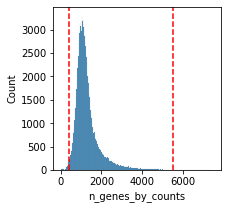

In [38]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(cadata.obs['n_genes_by_counts'], kde=False)
plt.axvline(x=400,linestyle='--',color='red')
plt.axvline(x=5500,linestyle='--',color='red')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


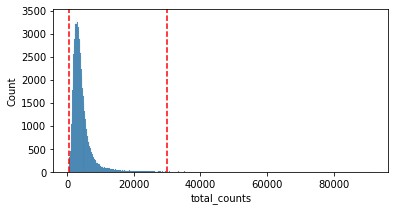

In [39]:
fig, ax = plt.subplots(figsize=(6, 3))
p3 = sns.histplot(cadata.obs['total_counts'], kde=False)
plt.axvline(x=500,linestyle='--',color='red')
plt.axvline(x=30000,linestyle='--',color='red')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


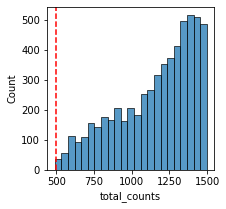

In [40]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(cadata.obs['total_counts'][cadata.obs['total_counts']<1500], kde=False)
plt.axvline(x=500,linestyle='--',color='red')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


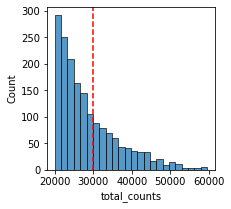

In [41]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(cadata.obs['total_counts'][(cadata.obs['total_counts']>20000)&(cadata.obs['total_counts']<60000)], kde=False)
plt.axvline(x=30000,linestyle='--',color='red')

In [43]:
adata2 = cadata[(cadata.obs.n_genes_by_counts > 400)&(cadata.obs.n_genes_by_counts < 5500), :].copy()
adata2 = adata2[(adata2.obs.total_counts > 500)&(adata2.obs.total_counts < 30000), :].copy()
adata2

AnnData object with n_obs × n_vars = 131549 × 33694
    obs: 'Sample', 'Tissue_type', 'Patient', 'Selection', 'Sex', 'Age', 'Race', 'Smoking', 'Alcohol', 'DataID', 'Cancertype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'Count'

# Normalization

In [45]:
#Normalization
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)

In [50]:
#Mark helthy donors
adata2.obs['Tissue_type'] = adata2.obs['Tissue_type'].astype('str')
adata2.obs.loc[adata2.obs['Sample'].str.startswith('HD'),'Tissue_type'] = 'Healthy_'+adata2.obs.loc[adata2.obs['Sample'].str.startswith('HD'),'Tissue_type']

# LOY_prediction

In [54]:
import joblib
rf_classifier_loaded = joblib.load('9YgenesonlyFinalnew_model.pkl')
rf_classifier_loaded

RandomForestClassifier(random_state=42)

In [55]:
Ychrgenes = ['DDX3Y', 'UTY', 'KDM5D', 'USP9Y', 'ZFY', 'RPS4Y1', 'TMSB4Y', 'EIF1AY', 'NLGN4Y']
set(Ychrgenes).difference(adata2.var_names)

set()

In [56]:
#Obtain expression matrix
X_tumor = adata2[:, Ychrgenes].X.todense()
X_tumor = pd.DataFrame(X_tumor, columns=Ychrgenes, index=adata2.obs.index)
#Get results
tumor_predictions = rf_classifier_loaded.predict(X_tumor)
adata2.obs["RL_Prediction_Only9genes"]=tumor_predictions.copy()
adata2.obs['LOY'] = adata2.obs["RL_Prediction_Only9genes"].map({0: 'WTY_SCR', 1: 'LOY_SCR'})

In [59]:
adata2.write_h5ad('GSE139324_normalized.h5ad',compression='gzip')

# Select Male

In [5]:
Male = adata2[adata2.obs['Sex']=='Male',:].copy()
Male = Male[Male.obs['Patient']!='HNSCC_4',:].copy() #Possible wrong-labeled female due to near 100% LOY
Male

AnnData object with n_obs × n_vars = 90282 × 33694
    obs: 'Sample', 'Tissue_type', 'Patient', 'Selection', 'Sex', 'Age', 'Race', 'Smoking', 'Alcohol', 'DataID', 'Cancertype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'RL_Prediction_Only9genes', 'LOY'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'
    layers: 'Count'

# Overall LOY%

In [88]:
def get_LOY_fraction_plot(adata,ctlevel,title,n,m,file): 
    from scipy.stats import chi2_contingency

    #get count table
    data = pd.DataFrame(index = adata.obs[ctlevel].unique(), 
                        columns = ['LOY_SCR','WTY_SCR'])
    for loy in data.columns:
        data[loy]=pd.DataFrame(adata.obs.loc[adata.obs['LOY']==loy,ctlevel].value_counts()).iloc[:,0]     
    print(data)
    
    #get fraction table
    row_sum = data.sum(axis=1)
    data2 = data.div(row_sum,axis='rows')
    data2 = data2*100
    #sort 
    data2.sort_values('LOY_SCR',inplace=True)
    
    #plot
    fig, ax = plt.subplots(figsize=(n,m))
    data2.plot(kind='bar', stacked=True, color=['#c11c1d','#195697'],edgecolor='White',linewidth=1,ax=ax,width=0.9)
    labels = ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    plt.legend(loc = (1,0.5), fontsize = 7, frameon=False)
    plt.title(title,fontweight='bold')
    plt.savefig(file,bbox_inches='tight',dpi=300,transparent=True)
    
    return data2
    

               LOY_SCR  WTY_SCR
HNSCC_23_TIL       208     2071
HNSCC_12_TIL       455     1429
HNSCC_24_PBMC      337     2172
HNSCC_12_PBMC      379     1281
HNSCC_26_TIL       728     3202
HNSCC_23_PBMC       57     1511
HNSCC_6_PBMC        45     1615
HNSCC_22_TIL        94     2312
HNSCC_7_PBMC       205     1669
HNSCC_5_PBMC        31     1595
HNSCC_24_TIL       537     3125
HNSCC_1_PBMC       217     1498
HNSCC_25_PBMC      304     1434
HNSCC_16_PBMC      301     1757
HNSCC_13_PBMC      543     1323
HNSCC_6_TIL        123     1515
HNSCC_20_TIL       126      984
HNSCC_25_TIL       622     3152
HNSCC_2_TIL        180     2064
HNSCC_13_TIL       493     1302
HNSCC_5_TIL         30      402
HNSCC_10_TIL       211     1129
HNSCC_19_TIL        83     1062
HNSCC_19_PBMC      190     2051
HNSCC_21_PBMC      153     1578
HNSCC_10_PBMC      185     1550
HNSCC_22_PBMC      109     2062
HNSCC_16_TIL       623     2992
HNSCC_2_PBMC        99     1364
HNSCC_17_PBMC      337     1441
HNSCC_17

/tmp/ipykernel_322545/3128693129.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


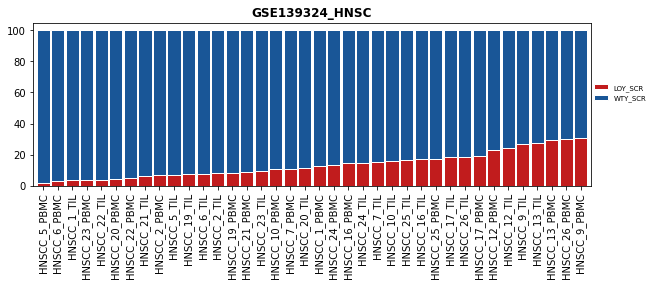

In [89]:
#Fig 5c
meta = adata2.obs.loc[:,['Sample', 'Tissue_type', 'Patient', 'Selection', 'Sex','Age']].drop_duplicates()
data2 = get_LOY_fraction_plot(Male[Male.obs['Tissue_type'].isin(['TIL','PBMC']),],ctlevel='Sample',title='GSE139324_HNSC',n=10,m=3,
                             file='GSE139324_HNSC_cancer_patient_LOY_stacked_bar.pdf')

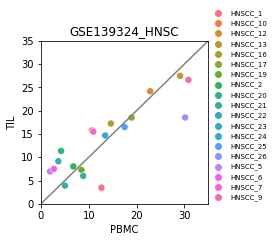

In [91]:
#Fig5d
#Copy meta data
data2['Patient'] = data2.index.map(dict(zip(meta['Sample'],meta['Patient'])))
data2['Selection'] = data2.index.map(dict(zip(meta['Sample'],meta['Selection'])))
data2['Tissue_type'] = data2.index.map(dict(zip(meta['Sample'],meta['Tissue_type'])))
#Remove healthy samples
data = data2.loc[~data2['Tissue_type'].str.startswith('Healthy'),:]
data = data.pivot_table(index=['Patient'], columns='Tissue_type', values='LOY_SCR', fill_value=0)
#Plotting
fig, ax = plt.subplots(figsize=(3, 3))
p = sns.scatterplot(
                x='PBMC',
                y="TIL",
                s=50,
                hue='Patient',
                #cmap='RdYlBu_r',
                data=data,
    )
ax.set(ylim=(0,35))
ax.set(xlim=(0,35))
ax.set_title('GSE139324_HNSC')
ax.axline((0, 0), slope=1,color='gray')
plt.legend(loc = (1,0), fontsize = 7, frameon=False)
plt.savefig('GSE139324_TIL&PBMC_scatter.pdf', dpi=300, bbox_inches='tight')

# Cell Typing

In [48]:
sc.pp.highly_variable_genes(adata2, flavor = 'seurat_v3', n_top_genes=2000, layer = "Count", 
                            subset = False, inplace=True)

In [50]:
import scvi
scvi.model.SCVI.setup_anndata(adata2, layer = 'Count', batch_key='Sample')
vae = scvi.model.SCVI(adata2)
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 61/61: 100%|██████████| 61/61 [1:26:02<00:00, 88.55s/it, v_num=1, train_loss_step=3.95e+3, train_loss_epoch=3.9e+3] 

`Trainer.fit` stopped: `max_epochs=61` reached.


Epoch 61/61: 100%|██████████| 61/61 [1:26:02<00:00, 84.63s/it, v_num=1, train_loss_step=3.95e+3, train_loss_epoch=3.9e+3]


In [51]:
SCVI_LATENT_KEY = "X_scVI"
adata2.obsm[SCVI_LATENT_KEY] = vae.get_latent_representation(adata2)

In [52]:
sc.pp.neighbors(adata2, use_rep = SCVI_LATENT_KEY)
sc.tl.umap(adata2)

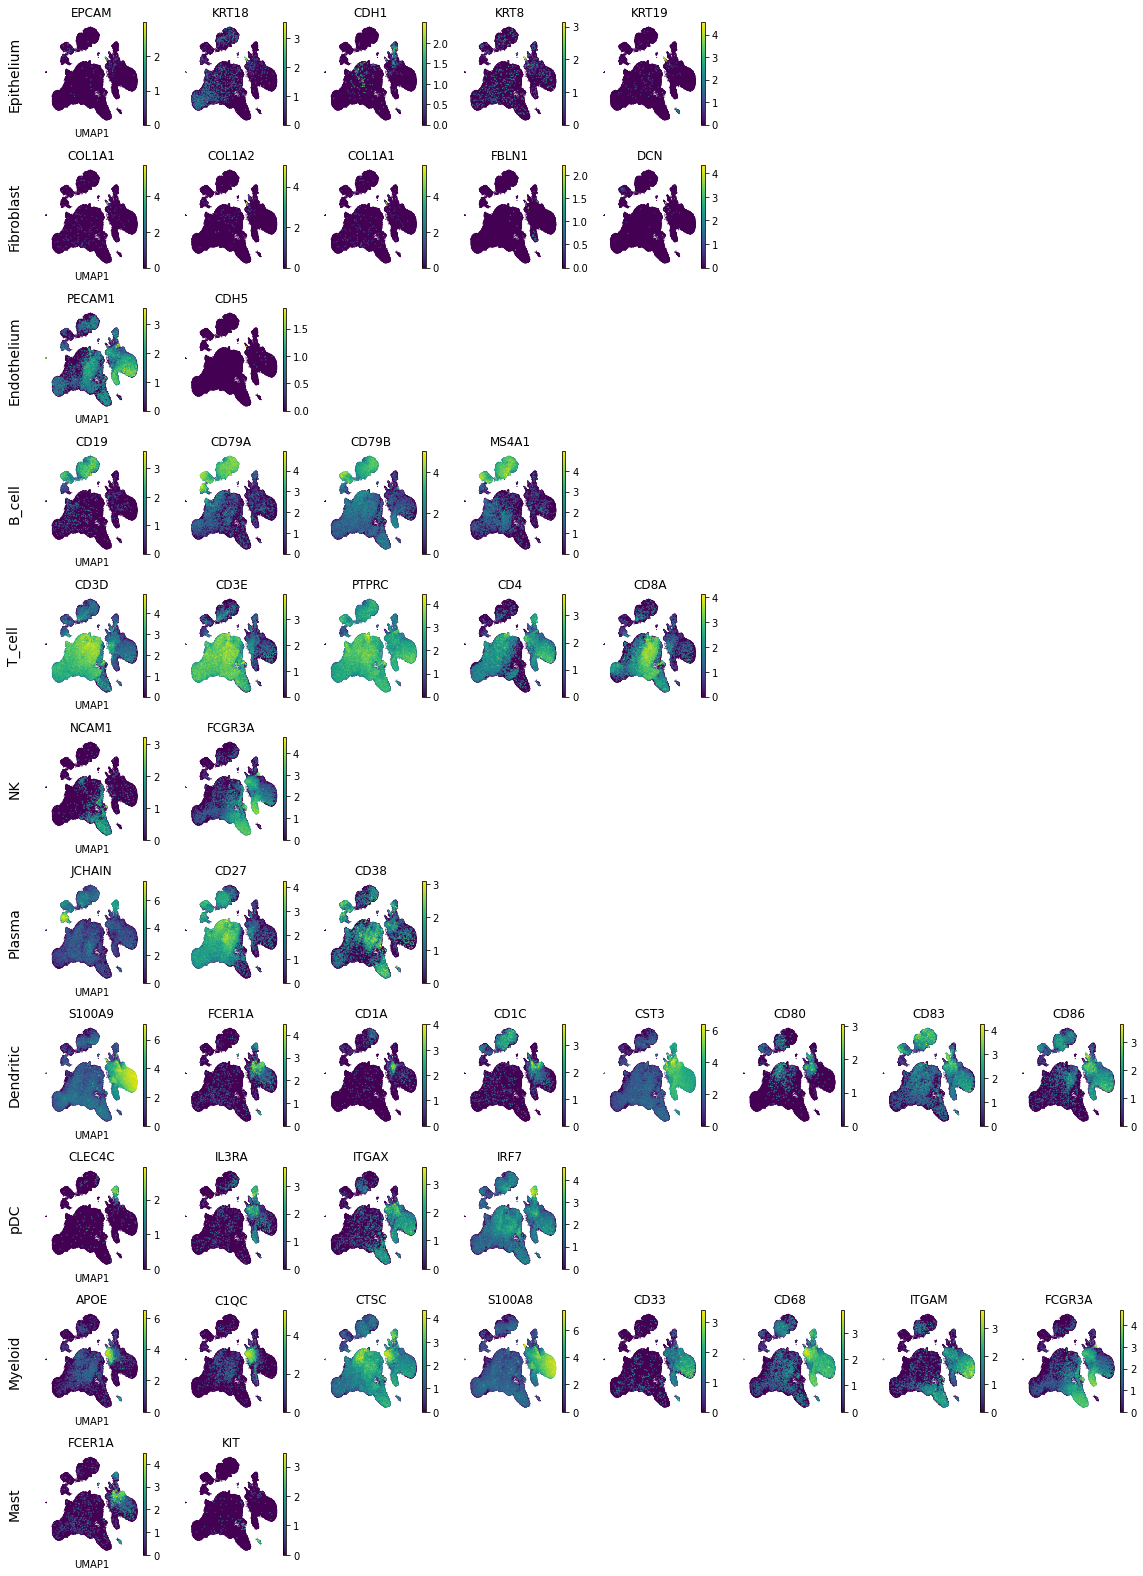

In [155]:
marker_genes = {
    
    
    'Epithelium': ['EPCAM','KRT18',"CDH1","KRT8",'KRT19'],
    
    'Fibroblast':['COL1A1','COL1A2','COL1A1','FBLN1','DCN'],
    'Endothelium':['PECAM1','CDH5'],
    
    
    'B_cell':['CD19','CD79A','CD79B','MS4A1'],
    'T_cell':['CD3D','CD3E','PTPRC','CD4','CD8A'],
    'NK':['NCAM1','FCGR3A'],
    'Plasma':['JCHAIN','CD27','CD38'],
    
    'Dendritic':['S100A9', 'FCER1A','CD1A','CD1C','CST3','CD80','CD83','CD86'],
    'pDC':['CLEC4C','IL3RA','ITGAX','IRF7'],
    
    
    'Myeloid':['APOE','C1QC','CTSC','S100A8','CD33', 'CD68', 'ITGAM', 'FCGR3A'],
    'Mast':['FCER1A','KIT'],
}

nrow = len(marker_genes)
ncol = max([len(vs) for vs in marker_genes.values()])
fig, axs = plt.subplots(nrow, ncol, figsize=(2 * ncol, 2 * nrow))

for row_idx, (cell_type, markers) in enumerate(marker_genes.items()):
    col_idx = 0
    for marker in markers:
        ax = axs[row_idx, col_idx]
        sc.pl.umap(adata2, color=marker, ax=ax, show=False, frameon=False, s=5)
        if col_idx == 0:
            ax.axis("on")
            ax.tick_params(
                top="off",
                bottom="off",
                left="off",
                right="off",
                labelleft="on",
                labelbottom="off",
            )
            ax.set_ylabel(cell_type + "\n", rotation=90, fontsize=14)
            ax.set(frame_on=False)
        col_idx += 1
    # Remove unused column Axes in the current row
    while col_idx < ncol:
        axs[row_idx, col_idx].remove()
        col_idx += 1
# Alignment within the Figure
fig.tight_layout()

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


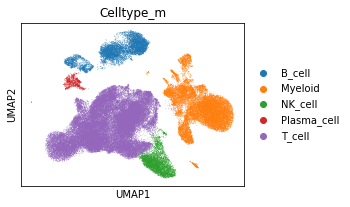

In [274]:
#Clustering
sc.tl.leiden(adata2, key_added="leiden_res0_1", resolution=0.1)
mapping = {
    '0': 'T_cell',
    '1': 'Myeloid',
    '2': 'B_cell',
    '3': 'NK_cell',
    '4': 'B_cell',
    '5': 'Myeloid',
    '6': 'Plasma_cell',
    '7': 'Myeloid',
    '8': 'Myeloid',
}
adata2.obs['Celltype_m'] = adata2.obs["leiden_res0_1"].map(mapping)
#Fig5b
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sc.pl.umap(adata2[adata2.obs['Sample'].isin(data2.index),:],color=['Celltype_m'],# groups='8',
           ncols=3,vmin = 'p10',vmax='p90',ax=ax, save='GSE139324_celltype_umap.pdf')#

In [59]:
adata2.write_h5ad('GSE139324_normalized.h5ad',compression='gzip')

# LOY in tumors

In [175]:
Male.obs['Sample_Celltypem'] = Male.obs['Sample'].astype('str') + '-' + Male.obs['Celltype_m'].astype('str')
Male.obs['Sample_Celltypem'].value_counts()

Sample_Celltypem
HNSCC_9_TIL-T_cell           4351
HNSCC_25_TIL-T_cell          3477
HNSCC_26_TIL-T_cell          3259
HNSCC_16_TIL-T_cell          2743
HNSCC_17_TIL-T_cell          2483
                             ... 
HNSCC_6_PBMC-Plasma_cell        2
HD_6_PBMC-Plasma_cell           2
HNSCC_16_PBMC-Plasma_cell       1
HNSCC_1_PBMC-Plasma_cell        1
HNSCC_5_TIL-Plasma_cell         1
Name: count, Length: 211, dtype: int64

                          LOY_SCR  WTY_SCR
HNSCC_23_TIL-Myeloid         69.0    637.0
HNSCC_23_TIL-T_cell         123.0   1305.0
HNSCC_23_TIL-B_cell           4.0     57.0
HNSCC_23_TIL-NK_cell          2.0     43.0
HNSCC_23_TIL-Plasma_cell     10.0     29.0
...                           ...      ...
HNSCC_9_TIL-T_cell         1070.0   3281.0
HNSCC_9_TIL-Myeloid         212.0    251.0
HNSCC_9_TIL-Plasma_cell      20.0    119.0
HNSCC_9_TIL-NK_cell          43.0     52.0
HNSCC_9_TIL-B_cell            5.0     22.0

[187 rows x 2 columns]


/tmp/ipykernel_322545/3128693129.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


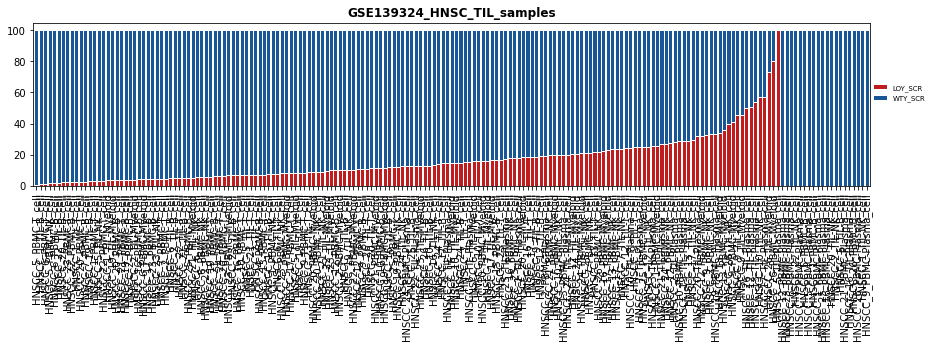

In [190]:
data2 = get_LOY_fraction_plot(Male[Male.obs['Tissue_type'].isin(['TIL','PBMC']),],ctlevel='Sample_Celltypem',
                              title='GSE139324_HNSC_TIL_samples',n=15,m=3,
                              file='GSE139324_HNSC_cancer_patient_LOY_celltypem_stacked_bar.pdf')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


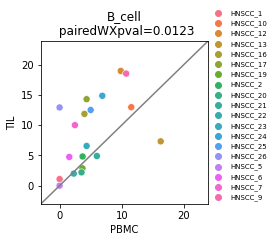

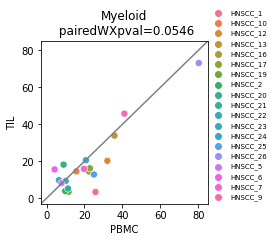

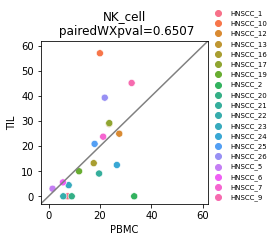

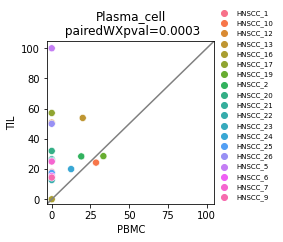

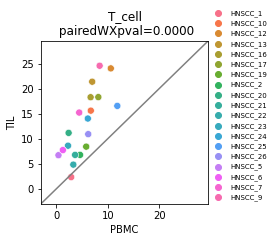

In [259]:
#Copy meta data
data2['Sample'] = [ind.split('-')[0] for ind in data2.index]
data2['Celltype'] = [ind.split('-')[1] for ind in data2.index]
data2['Patient'] = data2['Sample'].map(dict(zip(meta['Sample'],meta['Patient'])))
data2['Selection'] = data2['Sample'].map(dict(zip(meta['Sample'],meta['Selection'])))
data2['Tissue_type'] = data2['Sample'].map(dict(zip(meta['Sample'],meta['Tissue_type'])))
#Reshape data
data2 = data2.pivot_table(index=['Sample'], columns='Celltype', values='LOY_SCR', fill_value=0)
data2['Selection'] = [ind.split('_')[-1] for ind in data2.index]
data2['Patient'] = data2.index.map(dict(zip(meta['Sample'],meta['Patient'])))
#Fig5e
CTs = ['B_cell', 'Myeloid', 'NK_cell', 'Plasma_cell', 'T_cell']
for CT in CTs:   
    data3 = data2.pivot_table(index=['Patient'], columns='Selection', values=CT, fill_value=0)
    fig, ax = plt.subplots(figsize=(3, 3))
    p = sns.scatterplot(
                    x="PBMC",
                    y='TIL',
                    s=50,
                    hue='Patient',
                    data=data3,
        )
    ax.set(ylim=(-3,max(max(data3['PBMC']),max(data3['TIL']))+5))
    ax.set(xlim=(-3,max(max(data3['PBMC']),max(data3['TIL']))+5))
    ax.axline((0, 0), slope=1,color='gray')
    ax.set_title(CT+'\n pairedWXpval='+'%.4f'%scipy.stats.wilcoxon(data3['PBMC'],data3['TIL'])[1])
    plt.legend(loc = (1,0), fontsize = 7, frameon=False)
    
    plt.savefig('GSE139324_'+CT+'TIL&PBMC_scatter.pdf', dpi=300, bbox_inches='tight')

In [233]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


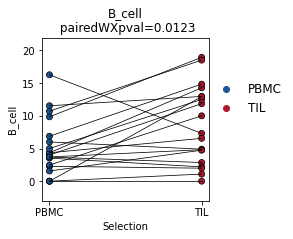

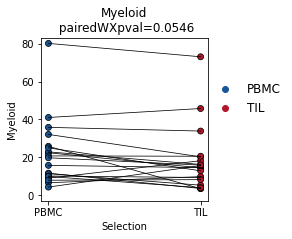

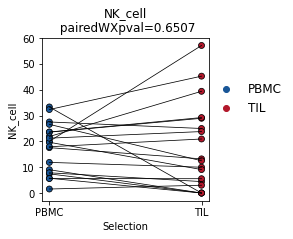

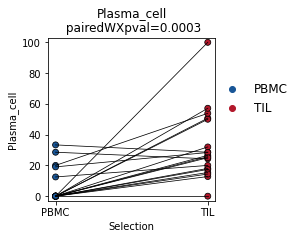

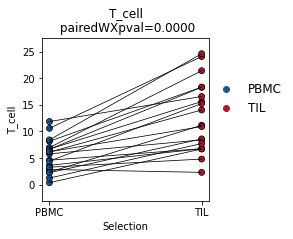

In [257]:
#Fig5e paired dots
CTs = ['B_cell', 'Myeloid', 'NK_cell', 'Plasma_cell', 'T_cell']
for CT in CTs:   
    data3 = data2.pivot_table(index=['Patient'], columns='Selection', values=CT, fill_value=0)
    #print(data3)
    fig, ax = plt.subplots(figsize=(3, 3))
    # Plotting the lines
    ax.plot( [0,1], [data3['PBMC'], data3['TIL']], c='k',linewidth=.75)
    # Draw dots
    sns.scatterplot(data=data2, x="Selection", y=CT, hue='Selection', palette = {'TIL':"#B2182B",'PBMC':"#195697"},
                  edgecolor="black", linewidth=.75,ax=ax)
    
    
    ax.set(ylim=(-3,max(data2[CT]+3)))
    ax.set_title(CT+'\n pairedWXpval='+'%.4f'%scipy.stats.wilcoxon(data3['PBMC'],data3['TIL'])[1])
    plt.legend(loc = (1,0.5), fontsize = 12, frameon=False)
    
    plt.savefig('GSE139324_'+CT+'TIL&PBMC_paired_dot.pdf', dpi=300, bbox_inches='tight')